In [1]:
import cmath
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import time

In [2]:
def create_signal(freq, t):
    sin = np.sin(2*np.pi*(freq*t))
    sin2 = 2*np.sin(2*np.pi*(2*freq*t))
    sin3 = np.sin(2*np.pi*(3*freq*t))
    return sin+sin2+sin3

In [18]:
def create_pure_tone(freq, t):
    angle = -2*np.pi*freq*t
    return np.cos(angle)+1j*np.sin(angle)

def compute_center_of_gravity(multi_signal):
    x_center = np.mean([x.real for x in multi_signal])
    y_center = np.mean([x.imag for x in multi_signal])
    return x_center, y_center

def compute_sum(multi_signal):
    x_sum = np.sum([x.real for x in multi_signal])
    y_sum = np.sum([x.imag for x in multi_signal])
    return x_sum, y_sum

def plt_ft(pure_tone_freq, signal_freq, t):
    pure_tone = create_pure_tone(pure_tone_freq, t)
    signal = create_signal(signal_freq, t)
    
    fig, ax = plt.subplots(1,2, figsize=(20,8))
    plot_signal(pure_tone, t, ax=ax[0])
    plot_signal(signal, t, ax=ax[0])
    ax[0].set_title(f'Pure tone freq {pure_tone_freq}')
    ax[0].legend(['Pure tone', 'Signal'])
    ax[0].grid('on')
    # the ft is on the time domain the multiply of the signal (g(t)) by a pure tone (e^(-i*2*pi*f*t))
    multi_signal = pure_tone*signal
    
    X = [x.real for x in multi_signal]
    Y = [x.imag for x in multi_signal]
    
    ax[1].plot(X,Y)
    
    x_center, y_center = compute_center_of_gravity(multi_signal)
    ax[1].plot(x_center, y_center, marker='o', markersize=10)
    
    x_sum, y_sum = compute_sum(multi_signal)
    ax[1].plot(x_sum, y_sum, marker='o', markersize=10)
    
    # set origin axes
    ax[1] = plt.gca()
    ax[1].grid(True)
    ax[1].spines['left'].set_position('zero')
    ax[1].spines['right'].set_color('none')
    ax[1].spines['bottom'].set_position('zero')
    ax[1].spines['top'].set_color('none')
    
    

In [11]:
def plot_signal(signal, t, ax):
#     ax.figure(figsize=(10,8))
    ax.plot(t, signal)
    ax.set_xlabel('Time')
    ax.set_ylabel('Intensity')

In [12]:
TIME = np.linspace(0,1,10000)
signal = create_signal(1, TIME)
plot_signal(signal, TIME)

TypeError: plot_signal() missing 1 required positional argument: 'ax'

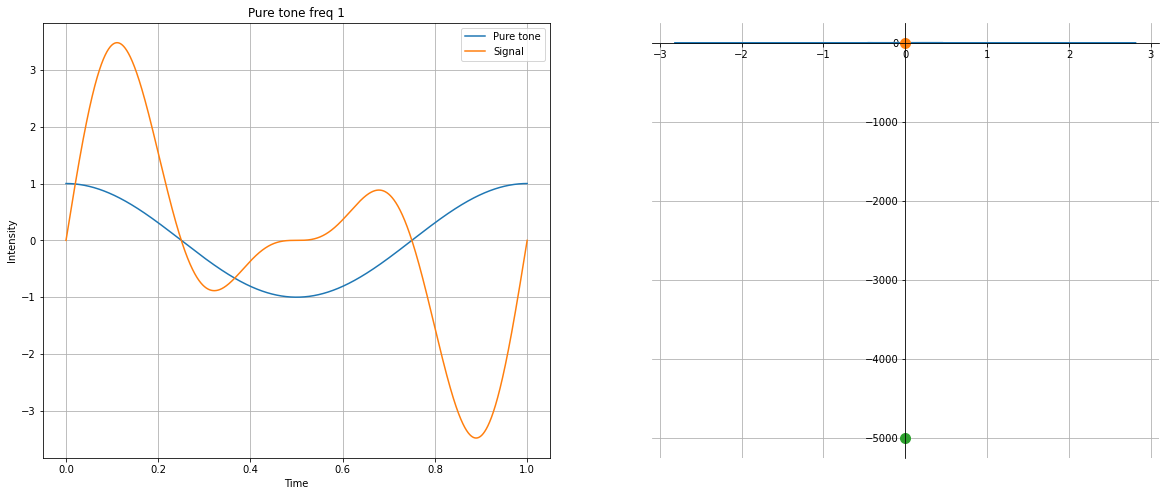

In [19]:
#the only freq that should have a center of mass out f the origin is those freq that compose the signal
#the sum of all points gives us the scaled magnitude of the espesific freq inside the signal...how much of the pure freq is part of the signal
for x in np.arange(1, 2, 1):
    plt_ft(pure_tone_freq=x, signal_freq=1, t=TIME)
    time.sleep(5)
    display.clear_output(wait=True)
    display.display(plt.gcf())

display.clear_output()

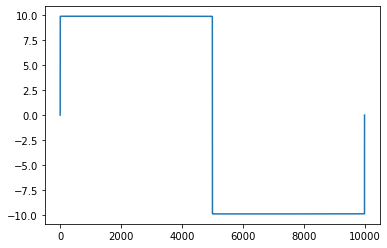

In [30]:
soma = 0
c = 1
TIME = np.linspace(0,2*np.pi,10000)
for n in range(1,100000,2):
    soma = soma + (4*c/n*np.pi)*np.sin(n*TIME)
plt.plot(soma)

In [18]:
soma

array([  0.        ,  19.64521583,  19.62929275, ..., -16.27746639,
       -16.33924755, -16.40197942])